<a href="https://colab.research.google.com/github/FREDY129053/AI_Systems_LABS/blob/main/Lab_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лаба 3.6: Нейронные сети

In [1]:
import pandas as pd

df = pd.read_csv('/content/lab_2_ready_df.csv')
df_copy = df.copy()

print(f"Размерность датасета: {df_copy.shape}")
df_copy.head()

Размерность датасета: (19997, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,lat,long,was_renovated_post90,has_basement,viewed,sale_month,yr_built_1950_to_1975,yr_built_1975_to_1997,yr_built_1997_to_2015,yr_built_pre1950
0,221900.0,3,1,1180,5650,1.0,0,3,7,47.5112,-122.257,0,0,0,10,1.0,0.0,0.0,0.0
1,538000.0,3,2,2570,7242,2.0,0,3,7,47.7210,-122.319,1,1,0,12,1.0,0.0,0.0,0.0
2,180000.0,2,1,770,10000,1.0,0,3,6,47.7379,-122.233,0,0,0,2,0.0,0.0,0.0,1.0
3,604000.0,4,3,1960,5000,1.0,0,5,7,47.5208,-122.393,0,1,0,12,1.0,0.0,0.0,0.0
4,510000.0,3,2,1680,8080,1.0,0,3,8,47.6168,-122.045,0,0,0,2,0.0,1.0,0.0,0.0


## Разбиение данных

In [2]:
X = df_copy.drop('price', axis=1)
y = df_copy['price']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation set shape: X_val={X_val.shape}, y_val={y_val.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(13997, 18), y_train=(13997,)
Validation set shape: X_val=(3000, 18), y_val=(3000,)
Test set shape: X_test=(3000, 18), y_test=(3000,)


## Модели

In [29]:
rmses = {}

In [30]:
import torch

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [31]:
def learn_model(model, epochs=300):
  criterion = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  for epoch in range(epochs):
      model.train()
      optimizer.zero_grad()
      outputs = model(X_train_tensor)
      loss = criterion(outputs, y_train_tensor)
      loss.backward()
      optimizer.step()

      model.eval()
      with torch.no_grad():
          val_outputs = model(X_val_tensor)
          val_loss = criterion(val_outputs, y_val_tensor)

      if (epoch + 1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

In [32]:
import numpy as np

def get_test_rmse(model):

  model.eval()
  with torch.no_grad():
      y_predict_tensor = model(X_test_tensor)
      y_predict_np = y_predict_tensor.numpy()
      y_test_np = y_test_tensor.numpy()

  return np.sqrt(mean_squared_error(y_test_np, y_predict_np))

### Линейная регрессия

In [33]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error

model_lin_reg = nn.Sequential(
    nn.Linear(X_train.shape[1], 1)
)

learn_model(model_lin_reg)

Epoch [10/300], Train Loss: 319608520704.0000, Val Loss: 311084974080.0000
Epoch [20/300], Train Loss: 319484690432.0000, Val Loss: 310963208192.0000
Epoch [30/300], Train Loss: 319360892928.0000, Val Loss: 310841409536.0000
Epoch [40/300], Train Loss: 319237193728.0000, Val Loss: 310719709184.0000
Epoch [50/300], Train Loss: 319113560064.0000, Val Loss: 310598074368.0000
Epoch [60/300], Train Loss: 318989991936.0000, Val Loss: 310476505088.0000
Epoch [70/300], Train Loss: 318866489344.0000, Val Loss: 310355034112.0000
Epoch [80/300], Train Loss: 318743117824.0000, Val Loss: 310233595904.0000
Epoch [90/300], Train Loss: 318619746304.0000, Val Loss: 310112288768.0000
Epoch [100/300], Train Loss: 318496473088.0000, Val Loss: 309991014400.0000
Epoch [110/300], Train Loss: 318373298176.0000, Val Loss: 309869772800.0000
Epoch [120/300], Train Loss: 318250156032.0000, Val Loss: 309748662272.0000
Epoch [130/300], Train Loss: 318127112192.0000, Val Loss: 309627584512.0000
Epoch [140/300], Trai

In [34]:
rmse_lin = get_test_rmse(model_lin_reg)
rmses['Линейная регрессия'] = rmse_lin
print(f"\nRMSE on the test set: {rmse_lin:.4f}")


RMSE on the test set: 552142.6552


### Нейронка 1

In [35]:
import torch.nn as nn

model_nn1 = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

learn_model(model=model_nn1)

Epoch [10/300], Train Loss: 321572798464.0000, Val Loss: 312976736256.0000
Epoch [20/300], Train Loss: 321032585216.0000, Val Loss: 312443437056.0000
Epoch [30/300], Train Loss: 320463175680.0000, Val Loss: 311879598080.0000
Epoch [40/300], Train Loss: 319843172352.0000, Val Loss: 311263657984.0000
Epoch [50/300], Train Loss: 319149146112.0000, Val Loss: 310572384256.0000
Epoch [60/300], Train Loss: 318355013632.0000, Val Loss: 309780054016.0000
Epoch [70/300], Train Loss: 317426794496.0000, Val Loss: 308852228096.0000
Epoch [80/300], Train Loss: 316321759232.0000, Val Loss: 307746504704.0000
Epoch [90/300], Train Loss: 315007369216.0000, Val Loss: 306431426560.0000
Epoch [100/300], Train Loss: 313464520704.0000, Val Loss: 304888643584.0000
Epoch [110/300], Train Loss: 311692951552.0000, Val Loss: 303121268736.0000
Epoch [120/300], Train Loss: 309706784768.0000, Val Loss: 301144014848.0000
Epoch [130/300], Train Loss: 307521781760.0000, Val Loss: 298971267072.0000
Epoch [140/300], Trai

In [36]:
rmse_nn1 = get_test_rmse(model_nn1)
rmses['Нейронка 1(64 нейронов + ReLU)'] = rmse_nn1
print(f"\nRMSE on the test set: {rmse_nn1:.4f}")


RMSE on the test set: 485809.8146


### Нейронка 2

In [37]:
import torch.nn as nn

model_nn2 = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

learn_model(model=model_nn2)

rmse_nn2 = get_test_rmse(model_nn2)
rmses['Нейронка 2(128 нейронов + ReLU)'] = rmse_nn2
print(f"\nRMSE on the test set: {rmse_nn2:.4f}")

Epoch [10/300], Train Loss: 320896466944.0000, Val Loss: 312252203008.0000
Epoch [20/300], Train Loss: 319751258112.0000, Val Loss: 311122493440.0000
Epoch [30/300], Train Loss: 318552440832.0000, Val Loss: 309935013888.0000
Epoch [40/300], Train Loss: 317242310656.0000, Val Loss: 308631011328.0000
Epoch [50/300], Train Loss: 315757953024.0000, Val Loss: 307149471744.0000
Epoch [60/300], Train Loss: 314053722112.0000, Val Loss: 305448419328.0000
Epoch [70/300], Train Loss: 312095997952.0000, Val Loss: 303494234112.0000
Epoch [80/300], Train Loss: 309851717632.0000, Val Loss: 301254246400.0000
Epoch [90/300], Train Loss: 307297386496.0000, Val Loss: 298706239488.0000
Epoch [100/300], Train Loss: 304406331392.0000, Val Loss: 295821737984.0000
Epoch [110/300], Train Loss: 301156401152.0000, Val Loss: 292578263040.0000
Epoch [120/300], Train Loss: 297529114624.0000, Val Loss: 288958676992.0000
Epoch [130/300], Train Loss: 293545967616.0000, Val Loss: 284991586304.0000
Epoch [140/300], Trai

### Нейронка 3

In [38]:
import torch.nn as nn

model_nn3 = nn.Sequential(
    nn.Linear(X_train.shape[1], 256),
    nn.ReLU(),
    nn.Linear(256, 1)
)

learn_model(model=model_nn3)

rmse_nn3 = get_test_rmse(model_nn3)
rmses['Нейронка 3(256 нейронов + ReLU)'] = rmse_nn3
print(f"\nRMSE on the test set: {rmse_nn3:.4f}")

Epoch [10/300], Train Loss: 320202178560.0000, Val Loss: 311475863552.0000
Epoch [20/300], Train Loss: 318066622464.0000, Val Loss: 309365866496.0000
Epoch [30/300], Train Loss: 315779645440.0000, Val Loss: 307094814720.0000
Epoch [40/300], Train Loss: 313221480448.0000, Val Loss: 304542679040.0000
Epoch [50/300], Train Loss: 310262136832.0000, Val Loss: 301581434880.0000
Epoch [60/300], Train Loss: 306786828288.0000, Val Loss: 298101112832.0000
Epoch [70/300], Train Loss: 302706294784.0000, Val Loss: 294015205376.0000
Epoch [80/300], Train Loss: 297947889664.0000, Val Loss: 289252278272.0000
Epoch [90/300], Train Loss: 292471472128.0000, Val Loss: 283772321792.0000
Epoch [100/300], Train Loss: 286257971200.0000, Val Loss: 277555707904.0000
Epoch [110/300], Train Loss: 279332683776.0000, Val Loss: 270631501824.0000
Epoch [120/300], Train Loss: 271789981696.0000, Val Loss: 263095320576.0000
Epoch [130/300], Train Loss: 263761084416.0000, Val Loss: 255078170624.0000
Epoch [140/300], Trai

### Нейронка 4

In [39]:
import torch.nn as nn

model_nn4 = nn.Sequential(
    nn.Linear(X_train.shape[1], 512),
    nn.ReLU(),
    nn.Linear(512, 1)
)

learn_model(model=model_nn4)

rmse_nn4 = get_test_rmse(model_nn4)
rmses['Нейронка 4(512 нейронов + ReLU)'] = rmse_nn4
print(f"\nRMSE on the test set: {rmse_nn4:.4f}")

Epoch [10/300], Train Loss: 318666244096.0000, Val Loss: 309799288832.0000
Epoch [20/300], Train Loss: 314786709504.0000, Val Loss: 305954226176.0000
Epoch [30/300], Train Loss: 310524575744.0000, Val Loss: 301704970240.0000
Epoch [40/300], Train Loss: 305641455616.0000, Val Loss: 296818016256.0000
Epoch [50/300], Train Loss: 299929600000.0000, Val Loss: 291091218432.0000
Epoch [60/300], Train Loss: 293226184704.0000, Val Loss: 284367290368.0000
Epoch [70/300], Train Loss: 285415571456.0000, Val Loss: 276528398336.0000
Epoch [80/300], Train Loss: 276416757760.0000, Val Loss: 267492261888.0000
Epoch [90/300], Train Loss: 266261430272.0000, Val Loss: 257301643264.0000
Epoch [100/300], Train Loss: 255162843136.0000, Val Loss: 246171041792.0000
Epoch [110/300], Train Loss: 243407781888.0000, Val Loss: 234374774784.0000
Epoch [120/300], Train Loss: 231329644544.0000, Val Loss: 222240260096.0000
Epoch [130/300], Train Loss: 219346763776.0000, Val Loss: 210181275648.0000
Epoch [140/300], Trai

### Нейронка 5

In [40]:
import torch.nn as nn

model_nn5 = nn.Sequential(
    nn.Linear(X_train.shape[1], 1024),
    nn.ReLU(),
    nn.Linear(1024, 1)
)

learn_model(model=model_nn5)

rmse_nn5 = get_test_rmse(model_nn5)
rmses['Нейронка 5(1024 нейронов + ReLU)'] = rmse_nn5
print(f"\nRMSE on the test set: {rmse_nn5:.4f}")

Epoch [10/300], Train Loss: 316415475712.0000, Val Loss: 307293650944.0000
Epoch [20/300], Train Loss: 309498970112.0000, Val Loss: 300433997824.0000
Epoch [30/300], Train Loss: 301857538048.0000, Val Loss: 292794957824.0000
Epoch [40/300], Train Loss: 292993499136.0000, Val Loss: 283894382592.0000
Epoch [50/300], Train Loss: 282586185728.0000, Val Loss: 273426169856.0000
Epoch [60/300], Train Loss: 270501052416.0000, Val Loss: 261264588800.0000
Epoch [70/300], Train Loss: 256802865152.0000, Val Loss: 247475437568.0000
Epoch [80/300], Train Loss: 241803001856.0000, Val Loss: 232372174848.0000
Epoch [90/300], Train Loss: 226104279040.0000, Val Loss: 216554930176.0000
Epoch [100/300], Train Loss: 210501730304.0000, Val Loss: 200800698368.0000
Epoch [110/300], Train Loss: 195882778624.0000, Val Loss: 185974112256.0000
Epoch [120/300], Train Loss: 183115595776.0000, Val Loss: 172943015936.0000
Epoch [130/300], Train Loss: 172967460864.0000, Val Loss: 162493988864.0000
Epoch [140/300], Trai

### Нейронка 6

In [41]:
import torch.nn as nn

model_nn6 = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.Sigmoid(),
    nn.Linear(64, 1)
)

learn_model(model=model_nn6)

rmse_nn6 = get_test_rmse(model_nn6)
rmses['Нейронка 6(64 нейронов + Sigmoid)'] = rmse_nn6
print(f"\nRMSE on the test set: {rmse_nn6:.4f}")

Epoch [10/300], Train Loss: 321919385600.0000, Val Loss: 313370050560.0000
Epoch [20/300], Train Loss: 321918861312.0000, Val Loss: 313369624576.0000
Epoch [30/300], Train Loss: 321918468096.0000, Val Loss: 313369198592.0000
Epoch [40/300], Train Loss: 321918042112.0000, Val Loss: 313368739840.0000
Epoch [50/300], Train Loss: 321917648896.0000, Val Loss: 313368313856.0000
Epoch [60/300], Train Loss: 321917190144.0000, Val Loss: 313367920640.0000
Epoch [70/300], Train Loss: 321916731392.0000, Val Loss: 313367494656.0000
Epoch [80/300], Train Loss: 321916272640.0000, Val Loss: 313367003136.0000
Epoch [90/300], Train Loss: 321915781120.0000, Val Loss: 313366511616.0000
Epoch [100/300], Train Loss: 321915191296.0000, Val Loss: 313365987328.0000
Epoch [110/300], Train Loss: 321914732544.0000, Val Loss: 313365463040.0000
Epoch [120/300], Train Loss: 321914273792.0000, Val Loss: 313365004288.0000
Epoch [130/300], Train Loss: 321913815040.0000, Val Loss: 313364578304.0000
Epoch [140/300], Trai

### Нейронка 7

In [42]:
import torch.nn as nn

model_nn7 = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.Sigmoid(),
    nn.Linear(128, 1)
)

learn_model(model=model_nn7)

rmse_nn7 = get_test_rmse(model_nn7)
rmses['Нейронка 7(128 нейронов + Sigmoid)'] = rmse_nn7
print(f"\nRMSE on the test set: {rmse_nn7:.4f}")

Epoch [10/300], Train Loss: 321918795776.0000, Val Loss: 313369460736.0000
Epoch [20/300], Train Loss: 321918009344.0000, Val Loss: 313368674304.0000
Epoch [30/300], Train Loss: 321917190144.0000, Val Loss: 313367855104.0000
Epoch [40/300], Train Loss: 321916370944.0000, Val Loss: 313367035904.0000
Epoch [50/300], Train Loss: 321915486208.0000, Val Loss: 313366216704.0000
Epoch [60/300], Train Loss: 321914667008.0000, Val Loss: 313365397504.0000
Epoch [70/300], Train Loss: 321913749504.0000, Val Loss: 313364447232.0000
Epoch [80/300], Train Loss: 321912733696.0000, Val Loss: 313363496960.0000
Epoch [90/300], Train Loss: 321911717888.0000, Val Loss: 313362415616.0000
Epoch [100/300], Train Loss: 321910669312.0000, Val Loss: 313361465344.0000
Epoch [110/300], Train Loss: 321909751808.0000, Val Loss: 313360515072.0000
Epoch [120/300], Train Loss: 321908834304.0000, Val Loss: 313359597568.0000
Epoch [130/300], Train Loss: 321907949568.0000, Val Loss: 313358712832.0000
Epoch [140/300], Trai

### Нейронка 8

In [43]:
import torch.nn as nn

model_nn8 = nn.Sequential(
    nn.Linear(X_train.shape[1], 256),
    nn.Sigmoid(),
    nn.Linear(256, 1)
)

learn_model(model=model_nn8)

rmse_nn8 = get_test_rmse(model_nn8)
rmses['Нейронка 8(256 нейронов + Sigmoid)'] = rmse_nn8
print(f"\nRMSE on the test set: {rmse_nn8:.4f}")

Epoch [10/300], Train Loss: 321917485056.0000, Val Loss: 313368117248.0000
Epoch [20/300], Train Loss: 321915912192.0000, Val Loss: 313366577152.0000
Epoch [30/300], Train Loss: 321914306560.0000, Val Loss: 313364938752.0000
Epoch [40/300], Train Loss: 321912700928.0000, Val Loss: 313363333120.0000
Epoch [50/300], Train Loss: 321910964224.0000, Val Loss: 313361629184.0000
Epoch [60/300], Train Loss: 321908965376.0000, Val Loss: 313359663104.0000
Epoch [70/300], Train Loss: 321906999296.0000, Val Loss: 313357664256.0000
Epoch [80/300], Train Loss: 321904967680.0000, Val Loss: 313355632640.0000
Epoch [90/300], Train Loss: 321902870528.0000, Val Loss: 313353601024.0000
Epoch [100/300], Train Loss: 321900871680.0000, Val Loss: 313351634944.0000
Epoch [110/300], Train Loss: 321898905600.0000, Val Loss: 313349636096.0000
Epoch [120/300], Train Loss: 321897005056.0000, Val Loss: 313347735552.0000
Epoch [130/300], Train Loss: 321895104512.0000, Val Loss: 313345900544.0000
Epoch [140/300], Trai

### Нейронка 9

In [44]:
import torch.nn as nn

model_nn9 = nn.Sequential(
    nn.Linear(X_train.shape[1], 512),
    nn.Sigmoid(),
    nn.Linear(512, 1)
)

learn_model(model=model_nn9)

rmse_nn9 = get_test_rmse(model_nn9)
rmses['Нейронка 9(512 нейронов + Sigmoid)'] = rmse_nn9
print(f"\nRMSE on the test set: {rmse_nn9:.4f}")

Epoch [10/300], Train Loss: 321916960768.0000, Val Loss: 313367461888.0000
Epoch [20/300], Train Loss: 321914142720.0000, Val Loss: 313364709376.0000
Epoch [30/300], Train Loss: 321911390208.0000, Val Loss: 313361924096.0000
Epoch [40/300], Train Loss: 321908441088.0000, Val Loss: 313358974976.0000
Epoch [50/300], Train Loss: 321905229824.0000, Val Loss: 313355862016.0000
Epoch [60/300], Train Loss: 321901756416.0000, Val Loss: 313352388608.0000
Epoch [70/300], Train Loss: 321897922560.0000, Val Loss: 313348554752.0000
Epoch [80/300], Train Loss: 321893859328.0000, Val Loss: 313344491520.0000
Epoch [90/300], Train Loss: 321889665024.0000, Val Loss: 313340297216.0000
Epoch [100/300], Train Loss: 321885241344.0000, Val Loss: 313335971840.0000
Epoch [110/300], Train Loss: 321880817664.0000, Val Loss: 313331548160.0000
Epoch [120/300], Train Loss: 321876426752.0000, Val Loss: 313327190016.0000
Epoch [130/300], Train Loss: 321872035840.0000, Val Loss: 313322864640.0000
Epoch [140/300], Trai

### Нейронка 10

In [45]:
import torch.nn as nn

model_nn10 = nn.Sequential(
    nn.Linear(X_train.shape[1], 1024),
    nn.Sigmoid(),
    nn.Linear(1024, 1)
)

learn_model(model=model_nn10)

rmse_nn10 = get_test_rmse(model_nn10)
rmses['Нейронка 10(1024 нейронов + Sigmoid)'] = rmse_nn10
print(f"\nRMSE on the test set: {rmse_nn10:.4f}")

Epoch [10/300], Train Loss: 321915158528.0000, Val Loss: 313365430272.0000
Epoch [20/300], Train Loss: 321909620736.0000, Val Loss: 313359925248.0000
Epoch [30/300], Train Loss: 321903788032.0000, Val Loss: 313354125312.0000
Epoch [40/300], Train Loss: 321897463808.0000, Val Loss: 313347833856.0000
Epoch [50/300], Train Loss: 321890615296.0000, Val Loss: 313340985344.0000
Epoch [60/300], Train Loss: 321883144192.0000, Val Loss: 313333514240.0000
Epoch [70/300], Train Loss: 321875116032.0000, Val Loss: 313325584384.0000
Epoch [80/300], Train Loss: 321866629120.0000, Val Loss: 313317130240.0000
Epoch [90/300], Train Loss: 321857880064.0000, Val Loss: 313308512256.0000
Epoch [100/300], Train Loss: 321848999936.0000, Val Loss: 313299599360.0000
Epoch [110/300], Train Loss: 321839890432.0000, Val Loss: 313290555392.0000
Epoch [120/300], Train Loss: 321830977536.0000, Val Loss: 313281740800.0000
Epoch [130/300], Train Loss: 321822326784.0000, Val Loss: 313273253888.0000
Epoch [140/300], Trai

### Нейронка 11

In [46]:
import torch.nn as nn

model_nn11 = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

learn_model(model=model_nn11)

rmse_nn11 = get_test_rmse(model_nn11)
rmses['Нейронка 11((64 нейронов)*2 + ReLU)'] = rmse_nn11
print(f"\nRMSE on the test set: {rmse_nn11:.4f}")

Epoch [10/300], Train Loss: 320590446592.0000, Val Loss: 311906598912.0000
Epoch [20/300], Train Loss: 318833459200.0000, Val Loss: 310138208256.0000
Epoch [30/300], Train Loss: 316498935808.0000, Val Loss: 307761774592.0000
Epoch [40/300], Train Loss: 313189203968.0000, Val Loss: 304385556480.0000
Epoch [50/300], Train Loss: 308531134464.0000, Val Loss: 299644026880.0000
Epoch [60/300], Train Loss: 302175584256.0000, Val Loss: 293189156864.0000
Epoch [70/300], Train Loss: 293788450816.0000, Val Loss: 284685271040.0000
Epoch [80/300], Train Loss: 283055915008.0000, Val Loss: 273819238400.0000
Epoch [90/300], Train Loss: 269875445760.0000, Val Loss: 260500307968.0000
Epoch [100/300], Train Loss: 254428430336.0000, Val Loss: 244901363712.0000
Epoch [110/300], Train Loss: 237261029376.0000, Val Loss: 227569811456.0000
Epoch [120/300], Train Loss: 219395178496.0000, Val Loss: 209512202240.0000
Epoch [130/300], Train Loss: 202265640960.0000, Val Loss: 192142295040.0000
Epoch [140/300], Trai

### Нейронка 12

In [47]:
import torch.nn as nn

model_nn12 = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

learn_model(model=model_nn12)

rmse_nn12 = get_test_rmse(model_nn12)
rmses['Нейронка 12((128 нейронов)*2 + ReLU)'] = rmse_nn12
print(f"\nRMSE on the test set: {rmse_nn12:.4f}")

Epoch [10/300], Train Loss: 318843453440.0000, Val Loss: 309998813184.0000
Epoch [20/300], Train Loss: 314550910976.0000, Val Loss: 305581522944.0000
Epoch [30/300], Train Loss: 307719634944.0000, Val Loss: 298535419904.0000
Epoch [40/300], Train Loss: 297137045504.0000, Val Loss: 287661555712.0000
Epoch [50/300], Train Loss: 281782059008.0000, Val Loss: 271961243648.0000
Epoch [60/300], Train Loss: 261183635456.0000, Val Loss: 250981515264.0000
Epoch [70/300], Train Loss: 235933089792.0000, Val Loss: 225328611328.0000
Epoch [80/300], Train Loss: 208539009024.0000, Val Loss: 197575213056.0000
Epoch [90/300], Train Loss: 183978819584.0000, Val Loss: 172676726784.0000
Epoch [100/300], Train Loss: 167609024512.0000, Val Loss: 155817492480.0000
Epoch [110/300], Train Loss: 160340492288.0000, Val Loss: 147820052480.0000
Epoch [120/300], Train Loss: 156549562368.0000, Val Loss: 143598764032.0000
Epoch [130/300], Train Loss: 152186224640.0000, Val Loss: 139624464384.0000
Epoch [140/300], Trai

### Нейронка 13

In [48]:
import torch.nn as nn

model_nn13 = nn.Sequential(
    nn.Linear(X_train.shape[1], 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 1)
)

learn_model(model=model_nn13)

rmse_nn13 = get_test_rmse(model_nn13)
rmses['Нейронка 13((256 нейронов)*2 + ReLU)'] = rmse_nn13
print(f"\nRMSE on the test set: {rmse_nn13:.4f}")

Epoch [10/300], Train Loss: 317043671040.0000, Val Loss: 307904249856.0000
Epoch [20/300], Train Loss: 308161839104.0000, Val Loss: 298667081728.0000
Epoch [30/300], Train Loss: 293482725376.0000, Val Loss: 283501002752.0000
Epoch [40/300], Train Loss: 271516221440.0000, Val Loss: 260947558400.0000
Epoch [50/300], Train Loss: 242373115904.0000, Val Loss: 231190282240.0000
Epoch [60/300], Train Loss: 209703124992.0000, Val Loss: 197987729408.0000
Epoch [70/300], Train Loss: 181894578176.0000, Val Loss: 169724821504.0000
Epoch [80/300], Train Loss: 167249100800.0000, Val Loss: 154333233152.0000
Epoch [90/300], Train Loss: 161161265152.0000, Val Loss: 147360219136.0000
Epoch [100/300], Train Loss: 153032343552.0000, Val Loss: 139738595328.0000
Epoch [110/300], Train Loss: 143963652096.0000, Val Loss: 131854647296.0000
Epoch [120/300], Train Loss: 135601889280.0000, Val Loss: 124283355136.0000
Epoch [130/300], Train Loss: 127661490176.0000, Val Loss: 116885970944.0000
Epoch [140/300], Trai

### Нейронка 14

In [49]:
import torch.nn as nn

model_nn14 = nn.Sequential(
    nn.Linear(X_train.shape[1], 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 1)
)

learn_model(model=model_nn14)

rmse_nn14 = get_test_rmse(model_nn14)
rmses['Нейронка 14((512 нейронов)*2 + ReLU)'] = rmse_nn14
print(f"\nRMSE on the test set: {rmse_nn14:.4f}")

Epoch [10/300], Train Loss: 305283923968.0000, Val Loss: 294538706944.0000
Epoch [20/300], Train Loss: 272996646912.0000, Val Loss: 260877336576.0000
Epoch [30/300], Train Loss: 226870820864.0000, Val Loss: 213599977472.0000
Epoch [40/300], Train Loss: 186413301760.0000, Val Loss: 172915589120.0000
Epoch [50/300], Train Loss: 176793468928.0000, Val Loss: 161853472768.0000
Epoch [60/300], Train Loss: 168273182720.0000, Val Loss: 153494372352.0000
Epoch [70/300], Train Loss: 157210984448.0000, Val Loss: 144739418112.0000
Epoch [80/300], Train Loss: 144990191616.0000, Val Loss: 132856348672.0000
Epoch [90/300], Train Loss: 129261469696.0000, Val Loss: 117406228480.0000
Epoch [100/300], Train Loss: 110921203712.0000, Val Loss: 100102692864.0000
Epoch [110/300], Train Loss: 91272716288.0000, Val Loss: 82144337920.0000
Epoch [120/300], Train Loss: 72962211840.0000, Val Loss: 65725779968.0000
Epoch [130/300], Train Loss: 57882869760.0000, Val Loss: 52545429504.0000
Epoch [140/300], Train Loss

### Нейронка 15

In [50]:
import torch.nn as nn

model_nn15 = nn.Sequential(
    nn.Linear(X_train.shape[1], 1024),
    nn.ReLU(),
    nn.Linear(1024, 1024),
    nn.ReLU(),
    nn.Linear(1024, 1)
)

learn_model(model=model_nn15)

rmse_nn15 = get_test_rmse(model_nn15)
rmses['Нейронка 15((1024 нейронов)*2 + ReLU)'] = rmse_nn15
print(f"\nRMSE on the test set: {rmse_nn15:.4f}")

Epoch [10/300], Train Loss: 270922858496.0000, Val Loss: 255605587968.0000
Epoch [20/300], Train Loss: 197525733376.0000, Val Loss: 182004416512.0000
Epoch [30/300], Train Loss: 183433052160.0000, Val Loss: 166615564288.0000
Epoch [40/300], Train Loss: 165489377280.0000, Val Loss: 151444029440.0000
Epoch [50/300], Train Loss: 150648029184.0000, Val Loss: 138329128960.0000
Epoch [60/300], Train Loss: 128648716288.0000, Val Loss: 116080762880.0000
Epoch [70/300], Train Loss: 99933437952.0000, Val Loss: 89043902464.0000
Epoch [80/300], Train Loss: 67561140224.0000, Val Loss: 59812474880.0000
Epoch [90/300], Train Loss: 45288361984.0000, Val Loss: 41615704064.0000
Epoch [100/300], Train Loss: 42992541696.0000, Val Loss: 41105121280.0000
Epoch [110/300], Train Loss: 42914492416.0000, Val Loss: 40649596928.0000
Epoch [120/300], Train Loss: 42069594112.0000, Val Loss: 39855390720.0000
Epoch [130/300], Train Loss: 42109370368.0000, Val Loss: 39842291712.0000
Epoch [140/300], Train Loss: 419896

### Нейронка 16

In [51]:
import torch.nn as nn

model_nn16 = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.Sigmoid(),
    nn.Linear(64, 64),
    nn.Sigmoid(),
    nn.Linear(64, 1)
)

learn_model(model=model_nn16)

rmse_nn16 = get_test_rmse(model_nn16)
rmses['Нейронка 16((64 нейронов)*2 + Sigmoid)'] = rmse_nn16
print(f"\nRMSE on the test set: {rmse_nn16:.4f}")

Epoch [10/300], Train Loss: 321919483904.0000, Val Loss: 313370181632.0000
Epoch [20/300], Train Loss: 321918828544.0000, Val Loss: 313369526272.0000
Epoch [30/300], Train Loss: 321918107648.0000, Val Loss: 313368838144.0000
Epoch [40/300], Train Loss: 321917452288.0000, Val Loss: 313368117248.0000
Epoch [50/300], Train Loss: 321916731392.0000, Val Loss: 313367429120.0000
Epoch [60/300], Train Loss: 321916076032.0000, Val Loss: 313366806528.0000
Epoch [70/300], Train Loss: 321915453440.0000, Val Loss: 313366151168.0000
Epoch [80/300], Train Loss: 321914863616.0000, Val Loss: 313365495808.0000
Epoch [90/300], Train Loss: 321914208256.0000, Val Loss: 313364938752.0000
Epoch [100/300], Train Loss: 321913552896.0000, Val Loss: 313364348928.0000
Epoch [110/300], Train Loss: 321912930304.0000, Val Loss: 313363693568.0000
Epoch [120/300], Train Loss: 321912307712.0000, Val Loss: 313363103744.0000
Epoch [130/300], Train Loss: 321911717888.0000, Val Loss: 313362448384.0000
Epoch [140/300], Trai

### Нерйонка 17

In [52]:
import torch.nn as nn

model_nn17 = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.Sigmoid(),
    nn.Linear(128, 128),
    nn.Sigmoid(),
    nn.Linear(128, 1)
)

learn_model(model=model_nn17)

rmse_nn17 = get_test_rmse(model_nn17)
rmses['Нейронка 17((128 нейронов)*2 + Sigmoid)'] = rmse_nn17
print(f"\nRMSE on the test set: {rmse_nn17:.4f}")

Epoch [10/300], Train Loss: 321918468096.0000, Val Loss: 313369100288.0000
Epoch [20/300], Train Loss: 321917026304.0000, Val Loss: 313367691264.0000
Epoch [30/300], Train Loss: 321915715584.0000, Val Loss: 313366413312.0000
Epoch [40/300], Train Loss: 321914503168.0000, Val Loss: 313365200896.0000
Epoch [50/300], Train Loss: 321913389056.0000, Val Loss: 313364086784.0000
Epoch [60/300], Train Loss: 321912274944.0000, Val Loss: 313362972672.0000
Epoch [70/300], Train Loss: 321911095296.0000, Val Loss: 313361825792.0000
Epoch [80/300], Train Loss: 321909915648.0000, Val Loss: 313360678912.0000
Epoch [90/300], Train Loss: 321908736000.0000, Val Loss: 313359532032.0000
Epoch [100/300], Train Loss: 321907621888.0000, Val Loss: 313358352384.0000
Epoch [110/300], Train Loss: 321906409472.0000, Val Loss: 313357205504.0000
Epoch [120/300], Train Loss: 321905229824.0000, Val Loss: 313355993088.0000
Epoch [130/300], Train Loss: 321904082944.0000, Val Loss: 313354878976.0000
Epoch [140/300], Trai

### Нейронка 18

In [53]:
import torch.nn as nn

model_nn18 = nn.Sequential(
    nn.Linear(X_train.shape[1], 256),
    nn.Sigmoid(),
    nn.Linear(256, 256),
    nn.Sigmoid(),
    nn.Linear(256, 1)
)

learn_model(model=model_nn18)

rmse_nn18 = get_test_rmse(model_nn18)
rmses['Нейронка 18((256 нейронов)*2 + Sigmoid)'] = rmse_nn18
print(f"\nRMSE on the test set: {rmse_nn18:.4f}")

Epoch [10/300], Train Loss: 321916993536.0000, Val Loss: 313367429120.0000
Epoch [20/300], Train Loss: 321914241024.0000, Val Loss: 313364774912.0000
Epoch [30/300], Train Loss: 321912078336.0000, Val Loss: 313362743296.0000
Epoch [40/300], Train Loss: 321910210560.0000, Val Loss: 313360875520.0000
Epoch [50/300], Train Loss: 321908277248.0000, Val Loss: 313358974976.0000
Epoch [60/300], Train Loss: 321906409472.0000, Val Loss: 313357107200.0000
Epoch [70/300], Train Loss: 321904476160.0000, Val Loss: 313355206656.0000
Epoch [80/300], Train Loss: 321902575616.0000, Val Loss: 313353273344.0000
Epoch [90/300], Train Loss: 321900576768.0000, Val Loss: 313351307264.0000
Epoch [100/300], Train Loss: 321898545152.0000, Val Loss: 313349373952.0000
Epoch [110/300], Train Loss: 321896546304.0000, Val Loss: 313347309568.0000
Epoch [120/300], Train Loss: 321894514688.0000, Val Loss: 313345310720.0000
Epoch [130/300], Train Loss: 321892417536.0000, Val Loss: 313343311872.0000
Epoch [140/300], Trai

### Нейронка 19

In [54]:
import torch.nn as nn

model_nn19 = nn.Sequential(
    nn.Linear(X_train.shape[1], 512),
    nn.Sigmoid(),
    nn.Linear(512, 512),
    nn.Sigmoid(),
    nn.Linear(512, 1)
)

learn_model(model=model_nn19)

rmse_nn19 = get_test_rmse(model_nn19)
rmses['Нейронка 19((512 нейронов)*2 + Sigmoid)'] = rmse_nn19
print(f"\nRMSE on the test set: {rmse_nn19:.4f}")

Epoch [10/300], Train Loss: 321913192448.0000, Val Loss: 313363529728.0000
Epoch [20/300], Train Loss: 321909424128.0000, Val Loss: 313359990784.0000
Epoch [30/300], Train Loss: 321906212864.0000, Val Loss: 313356779520.0000
Epoch [40/300], Train Loss: 321902837760.0000, Val Loss: 313353437184.0000
Epoch [50/300], Train Loss: 321899397120.0000, Val Loss: 313349996544.0000
Epoch [60/300], Train Loss: 321895792640.0000, Val Loss: 313346457600.0000
Epoch [70/300], Train Loss: 321892188160.0000, Val Loss: 313342820352.0000
Epoch [80/300], Train Loss: 321888452608.0000, Val Loss: 313339150336.0000
Epoch [90/300], Train Loss: 321884717056.0000, Val Loss: 313335447552.0000
Epoch [100/300], Train Loss: 321880817664.0000, Val Loss: 313331613696.0000
Epoch [110/300], Train Loss: 321876951040.0000, Val Loss: 313327779840.0000
Epoch [120/300], Train Loss: 321872953344.0000, Val Loss: 313323782144.0000
Epoch [130/300], Train Loss: 321868922880.0000, Val Loss: 313319817216.0000
Epoch [140/300], Trai

### Нейронка 20

In [55]:
import torch.nn as nn

model_nn20 = nn.Sequential(
    nn.Linear(X_train.shape[1], 1024),
    nn.Sigmoid(),
    nn.Linear(1024, 1024),
    nn.Sigmoid(),
    nn.Linear(1024, 1)
)

learn_model(model=model_nn20)

rmse_nn20 = get_test_rmse(model_nn20)
rmses['Нейронка 20((1024 нейронов)*2 + Sigmoid)'] = rmse_nn20
print(f"\nRMSE on the test set: {rmse_nn20:.4f}")

Epoch [10/300], Train Loss: 321906900992.0000, Val Loss: 313357107200.0000
Epoch [20/300], Train Loss: 321900347392.0000, Val Loss: 313350684672.0000
Epoch [30/300], Train Loss: 321893793792.0000, Val Loss: 313344196608.0000
Epoch [40/300], Train Loss: 321887109120.0000, Val Loss: 313337544704.0000
Epoch [50/300], Train Loss: 321880358912.0000, Val Loss: 313330827264.0000
Epoch [60/300], Train Loss: 321873543168.0000, Val Loss: 313324077056.0000
Epoch [70/300], Train Loss: 321866661888.0000, Val Loss: 313317294080.0000
Epoch [80/300], Train Loss: 321859616768.0000, Val Loss: 313310281728.0000
Epoch [90/300], Train Loss: 321852375040.0000, Val Loss: 313303040000.0000
Epoch [100/300], Train Loss: 321844838400.0000, Val Loss: 313295634432.0000
Epoch [110/300], Train Loss: 321837170688.0000, Val Loss: 313287966720.0000
Epoch [120/300], Train Loss: 321829240832.0000, Val Loss: 313280069632.0000
Epoch [130/300], Train Loss: 321821016064.0000, Val Loss: 313271975936.0000
Epoch [140/300], Trai

## Результаты разных настроек

In [58]:
from prettytable import PrettyTable

table = PrettyTable()
table.title = "Обучение нейронных сетей на 300 эпох без scale датасета"
table.field_names = ["Конфигурация модели", "RMSE"]

for k,v in rmses.items():
  name, rmse = k,v
  if name == "Нейронка 1(128 нейронов + ReLU)":
    name = "Нейронка 2(128 нейронов + ReLU)"
  if name == "Нейронка 1(256 нейронов + ReLU)":
    name = "Нейронка 3(256 нейронов + ReLU)"
  if name == "Нейронка 1(512 нейронов + ReLU)":
    name = "Нейронка 4(512 нейронов + ReLU)"
  if name == "Нейронка 1(1024 нейронов + ReLU)":
    name = "Нейронка 5(1024 нейронов + ReLU)"

  table.add_row([name, f"{v:.4f}"])

print(table)

+---------------------------------------------------------+
| Обучение нейронных сетей на 300 эпох без scale датасета |
+------------------------------------------+--------------+
|           Конфигурация модели            |     RMSE     |
+------------------------------------------+--------------+
|            Линейная регрессия            | 552142.6552  |
|      Нейронка 1(64 нейронов + ReLU)      | 485809.8146  |
|     Нейронка 2(128 нейронов + ReLU)      | 437121.2931  |
|     Нейронка 3(256 нейронов + ReLU)      | 386825.7629  |
|     Нейронка 4(512 нейронов + ReLU)      | 364463.4181  |
|     Нейронка 5(1024 нейронов + ReLU)     | 322834.2326  |
|    Нейронка 6(64 нейронов + Sigmoid)     | 557407.7125  |
|    Нейронка 7(128 нейронов + Sigmoid)    | 557395.6612  |
|    Нейронка 8(256 нейронов + Sigmoid)    | 557370.8522  |
|    Нейронка 9(512 нейронов + Sigmoid)    | 557319.5259  |
|   Нейронка 10(1024 нейронов + Sigmoid)   | 557219.9465  |
|   Нейронка 11((64 нейронов)*2 + ReLU) 

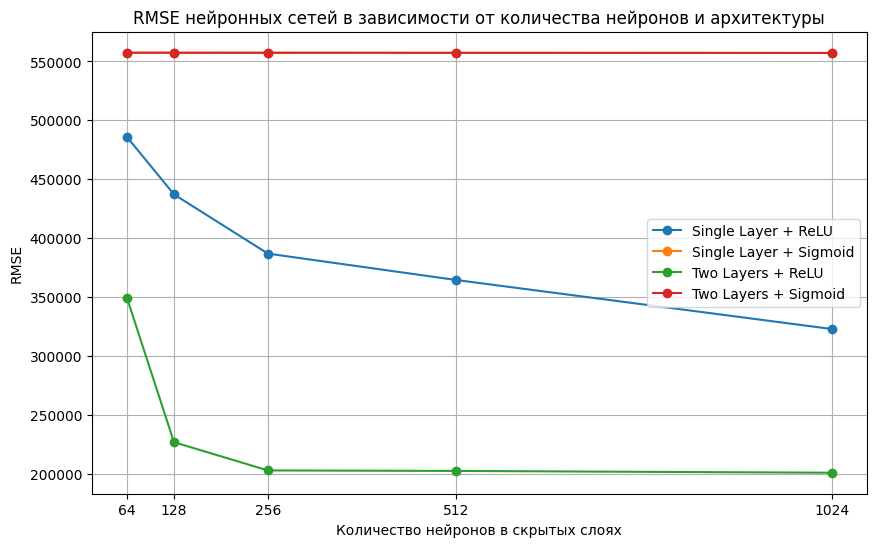

In [59]:
import matplotlib.pyplot as plt

nn_rmses = {k: v for k, v in rmses.items() if 'Нейронка' in k}

neurons = [64, 128, 256, 512, 1024]

rmse_groups = {
    'Single Layer + ReLU': [],
    'Single Layer + Sigmoid': [],
    'Two Layers + ReLU': [],
    'Two Layers + Sigmoid': []
}

for name, rmse in nn_rmses.items():
    if 'ReLU' in name:
        if '*2' in name:
            rmse_groups['Two Layers + ReLU'].append(rmse)
        else:
            rmse_groups['Single Layer + ReLU'].append(rmse)
    elif 'Sigmoid' in name:
        if '*2' in name:
            rmse_groups['Two Layers + Sigmoid'].append(rmse)
        else:
            rmse_groups['Single Layer + Sigmoid'].append(rmse)

for key in rmse_groups:
    sorted_pairs = sorted(zip(neurons, rmse_groups[key]))
    rmse_groups[key] = [rmse for neuron, rmse in sorted_pairs]

plt.figure(figsize=(10, 6))

for label, data in rmse_groups.items():
    if data: # Only plot if there is data for the group
        plt.plot(neurons, data, marker='o', label=label)

plt.xlabel('Количество нейронов в скрытых слоях')
plt.ylabel('RMSE')
plt.title('RMSE нейронных сетей в зависимости от количества нейронов и архитектуры')
plt.xticks(neurons)
plt.legend()
plt.grid(True)
plt.show()